In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu

In [3]:
ls osu_log/allreduce/N1

ls: osu_log/allreduce/N1: No such file or directory


In [4]:
def read_allreduce_scaling(suffix, prefix='./osu_log/allreduce/'):
    N_list = [1, 2, 4, 8, 16, 32]

    file_list = [prefix + 'N{0}n{1}'.format(N, N*36) + suffix for N in N_list]
    # print(file_list)
    
    df = read_osu_log_multi(file_list, [N*36 for N in N_list])
    return df

In [5]:
df_impi_efa = read_allreduce_scaling('/run3/intelmpi-efa/allreduce_default.log')
df_impi_tcp = read_allreduce_scaling('/run3/intelmpi-tcp/allreduce_default.log')
df_ompi3 = read_allreduce_scaling('/run3/openmpi3/allreduce_default.log')
df_ompi4 = read_allreduce_scaling('/run3/openmpi4/allreduce_default.log')
df_mpich = read_allreduce_scaling('/run3/mpich3/allreduce_default.log')

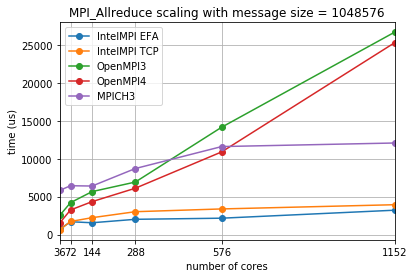

In [6]:
df_mapping = {
    'IntelMPI EFA': df_impi_efa, 
    'IntelMPI TCP': df_impi_tcp, 
    'OpenMPI3': df_ompi3, 
    'OpenMPI4': df_ompi4,
    'MPICH3': df_mpich
}

# message = 65536
message = 1048576

for name, df in df_mapping.items():
    df.loc[message].plot(marker='o', grid=True, label=name)
    
plt.xticks(df.columns)
plt.ylabel('time (us)')
plt.xlabel('number of cores')

plt.legend()

plt.title('MPI_Allreduce scaling with message size = {}'.format(message))
plt.savefig('allreduce_scaling.png', dpi=144, bbox_inches='tight')